In [2]:
import os
from pathlib import Path

import json
import joblib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
%matplotlib inline

from searchnets.plot.heatmaps import p_item_heatmap 

In [3]:
jsons_dir = Path('../../../data/visual_search_stimuli/json/')

In [4]:
jsons = sorted(
    list(jsons_dir.glob('*.json'))
)
jsons = [str(json_path) for json_path in jsons]

In [5]:
stim_abbrevs = ['RVvGV', 'RVvRHGV', '2_v_5']
alexnet_finetune_jsons = [a_json for a_json in jsons 
                          if any([f'alexnet_{stim_abbrev}' in a_json for stim_abbrev in stim_abbrevs])
                         ]
alexnet_finetune_jsons = sorted(alexnet_finetune_jsons)

In [6]:
data_gz_dir = Path('../../../data/data_prepd_for_nets/')

In [7]:
data_gzs = sorted(
    list(data_gz_dir.glob('*.gz'))
)
data_gzs = [str(data_gz) for data_gz in data_gzs]

In [8]:
alexnet_finetune_data_gzs = [data_gz for data_gz in data_gzs
                             if 'alexnet_finetune' in data_gz]
alexnet_finetune_data_gzs = sorted(alexnet_finetune_data_gzs)

In [13]:
np.arange(0.,0.11,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

/home/bart/anaconda3/envs/searchnets-tf1.13/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


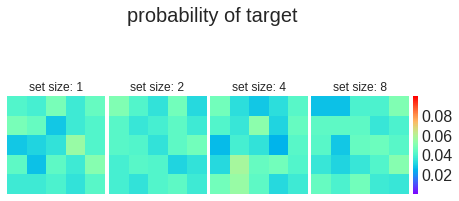

In [17]:
ps = []

fig = plt.figure()
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 4),
                axes_pad=0.05,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )

for ax_ind, set_size in enumerate([1,2,4,8]):
    set_size = str(set_size)

    p, im,ax = p_item_heatmap(json_fname=alexnet_finetune_jsons[0],
                            data_gz_fname=alexnet_finetune_data_gzs[0],
                            stim_abbrev='2_v_5',
                            set_size=set_size,
                            data_set='train',
                            item_char='t',
                            vmin=0.,
                            vmax=0.1,
                            ax=grid[ax_ind])
    ax.set_title(f'set size: {set_size}', fontsize=12)
    
    ps.append(p)

grid.cbar_axes[0].colorbar(im, ticks=np.arange(0.02,0.1,0.02))

for cax in grid.cbar_axes:
    cax.toggle_label(True)

fig.suptitle('probability of target');

In [27]:
ps[0]

array([[0.04125, 0.03875, 0.04875, 0.0375 , 0.045  ],
       [0.04875, 0.045  , 0.02875, 0.0375 , 0.04125],
       [0.02875, 0.03125, 0.035  , 0.055  , 0.04125],
       [0.04375, 0.0275 , 0.04375, 0.0375 , 0.05125],
       [0.0375 , 0.0375 , 0.04   , 0.035  , 0.0425 ]])

In [28]:
ps[1]

array([[0.05   , 0.04125, 0.035  , 0.0475 , 0.0325 ],
       [0.0425 , 0.03625, 0.03875, 0.04375, 0.0375 ],
       [0.0425 , 0.04125, 0.035  , 0.04375, 0.0475 ],
       [0.03875, 0.0425 , 0.04125, 0.03125, 0.035  ],
       [0.03875, 0.035  , 0.04125, 0.04375, 0.0375 ]])

In [29]:
ps[3]

array([[0.0275 , 0.0275 , 0.04   , 0.04   , 0.05   ],
       [0.04375, 0.04375, 0.04375, 0.03625, 0.04   ],
       [0.0425 , 0.02875, 0.045  , 0.04625, 0.0425 ],
       [0.03625, 0.03125, 0.03625, 0.04125, 0.05125],
       [0.045  , 0.04   , 0.0475 , 0.0375 , 0.03625]])